# The Sparks Foundation

# Data Science and Business Analytics Intern

## Author: Anwesha Datta

# Task 5: Exploratory Data Analysis- Sports



## Data Source: https://bit.ly/34SRn3b

## Problem Statement 1: Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’.
## Problem Statement 2: As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
## Problem Statement 3: Suggest teams or players a company should endorse for its products.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import the matches data set

In [2]:
match=pd.read_csv('matches.csv')
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
match.shape

(756, 18)

### Remove the columns not needed in the matches dataset

In [4]:
match_= match.drop(['umpire1','umpire2','umpire3'], axis=1)
match_.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


### Check for null values in the matches dataset 

In [5]:
match_.isna().sum()

id                 0
season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

### Find the cities which have null values 

In [6]:
match_[match_.city.isna()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


### Checked the match cities from the net and put those values in the null values from the city column 

In [7]:
match_.city=match_.city.fillna('Dubai')
match_.city.isna().sum()

0

### Find the values which have null from player of match column in the match dataset

In [8]:
match_[match_.player_of_match.isna()][['player_of_match','date']]

,player_of_match,date
300,NaN,2011-05-21
545,NaN,2015-04-29
570,NaN,2015-05-17
744,NaN,30/04/19


### Find the values which have null from winner column in the match dataset

In [28]:
match_[match_.winner.isna()][['winner','date']]

,winner,date
300,NaN,2011-05-21
545,NaN,2015-04-29
570,NaN,2015-05-17
744,NaN,30/04/19


The same row values are missing from the winner and player of match column in the matches dataset

### Check the values of the result columns for which the player of match and winner is missing

In [10]:
match_[match_.winner.isna()][['result','player_of_match','winner']]

,result,player_of_match,winner
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


The result values are missing as well for these three columns in the match dataset. So, there is no need to fill up these missing values.

### Import the deliveries dataset

In [11]:
deliveries=pd.read_csv('deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [12]:
deliveries.shape

(179078, 21)

### Check for null values in the deliveries dataset

In [13]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

### Join the two datasets together

In [14]:
merge = pd.merge(deliveries,match_, left_on='match_id', right_on ='id')
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"


In [15]:
merge.city.nunique()

33

In [16]:
merge.venue.nunique()

41

### Number of wins from each team

In [17]:
merge.winner.value_counts()

Mumbai Indians                 26305
Chennai Super Kings            24087
Kolkata Knight Riders          21644
Royal Challengers Bangalore    19553
Kings XI Punjab                19469
Rajasthan Royals               17948
Delhi Daredevils               15709
Sunrisers Hyderabad            13786
Deccan Chargers                 7013
Gujarat Lions                   3063
Pune Warriors                   2883
Delhi Capitals                  2436
Rising Pune Supergiant          2383
Kochi Tuskers Kerala            1322
Rising Pune Supergiants         1105
Name: winner, dtype: int64

### Rising Pune Supergiant has appeared twice due to a spelling changing, which needs to be fixed

In [18]:
merge.winner.replace(to_replace='Rising Pune Supergiants', value='Rising Pune Supergiant', inplace=True)
merge.winner.value_counts()

Mumbai Indians                 26305
Chennai Super Kings            24087
Kolkata Knight Riders          21644
Royal Challengers Bangalore    19553
Kings XI Punjab                19469
Rajasthan Royals               17948
Delhi Daredevils               15709
Sunrisers Hyderabad            13786
Deccan Chargers                 7013
Rising Pune Supergiant          3488
Gujarat Lions                   3063
Pune Warriors                   2883
Delhi Capitals                  2436
Kochi Tuskers Kerala            1322
Name: winner, dtype: int64

### Visualization of teams with most wins

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

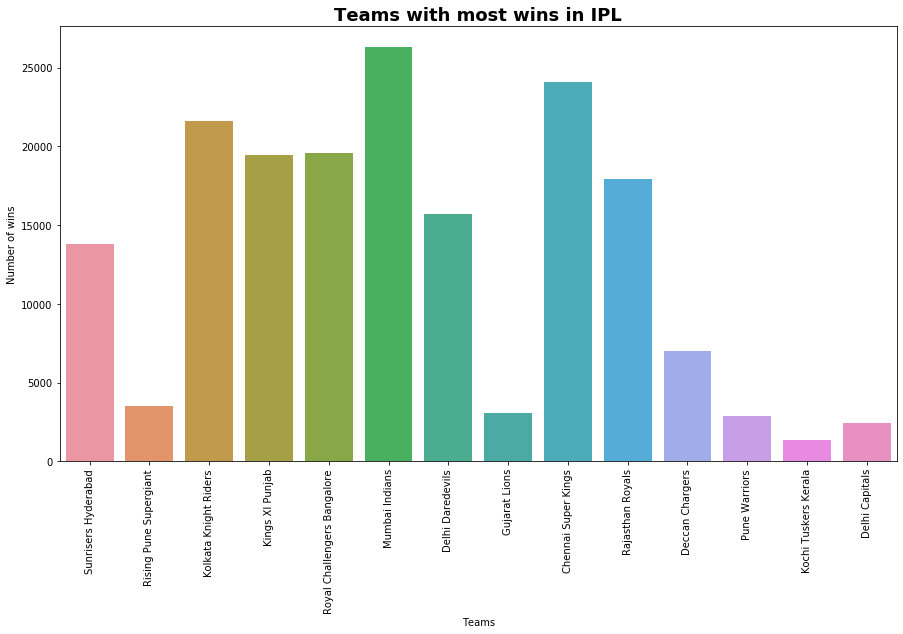

In [19]:
plt.figure(figsize=(15,8))
sns.countplot('winner', data = merge)
plt.title("Teams with most wins in IPL",fontsize=18,fontweight='bold')
plt.ylabel('Number of wins')
plt.xlabel('Teams')
plt.xticks(rotation=90)

###### Mumbai Indians has won the most matches in IPL

### Most decisions taken after a toss win

In [20]:
merge.toss_decision.value_counts()

field    109222
bat       69856
Name: toss_decision, dtype: int64

### Visualization of of the decision taken after a toss win

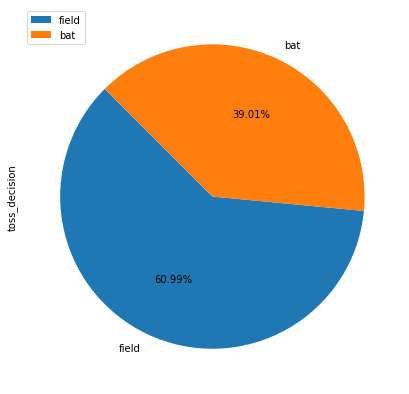

In [29]:
merge.toss_decision.value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10,7), startangle=135, legend=True)

### Visulization of the teams with most wins in a toss 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

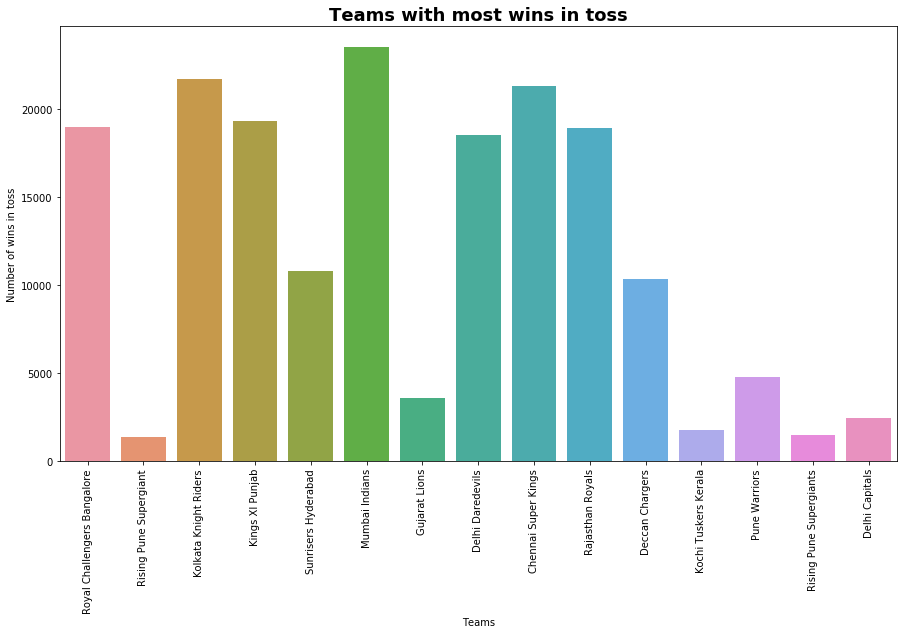

In [22]:
plt.figure(figsize=(15,8))
sns.countplot('toss_winner', data = merge)
plt.title("Teams with most wins in toss",fontsize=18,fontweight='bold')
plt.ylabel('Number of wins in toss')
plt.xlabel('Teams')
plt.xticks(rotation=90)

### Teams with most wins by batting first 

In [23]:
match.winner[match.win_by_runs>0].value_counts()


Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

### Teams with most wins by bowling first

In [24]:
match.winner[match.win_by_wickets>0].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Delhi Daredevils               42
Kings XI Punjab                42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

### Teams decision to bat first or second after winning toss

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

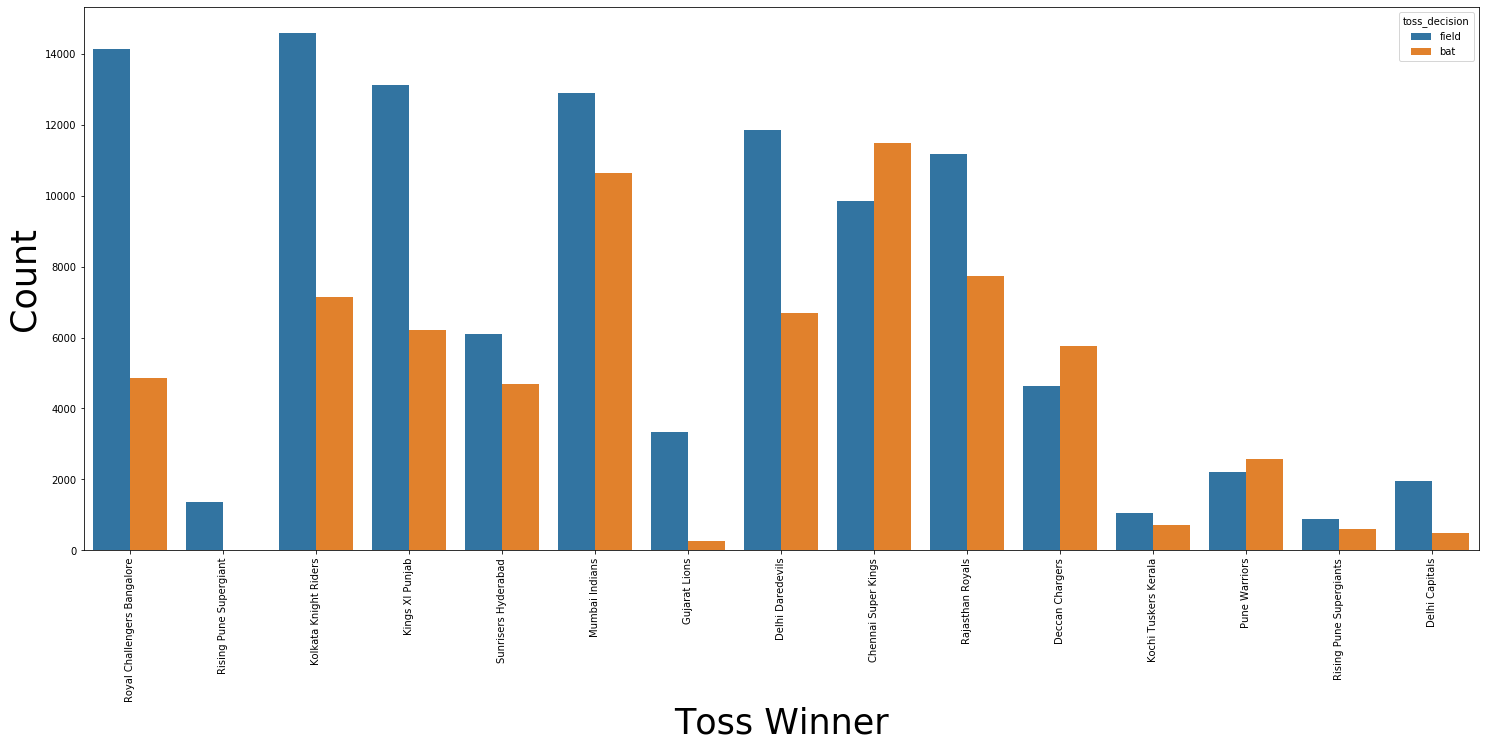

In [25]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = merge, hue = 'toss_decision')
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)
plt.xticks(rotation=90)

In [26]:
MoM=match.player_of_match.value_counts()
MoM

CH Gayle          21
AB de Villiers    20
RG Sharma         17
DA Warner         17
MS Dhoni          17
                  ..
SP Goswami         1
RP Singh           1
PP Ojha            1
NV Ojha            1
GJ Bailey          1
Name: player_of_match, Length: 226, dtype: int64

### Top 10 players with most number of man of the match awards

Text(0.5, 0, 'Players')

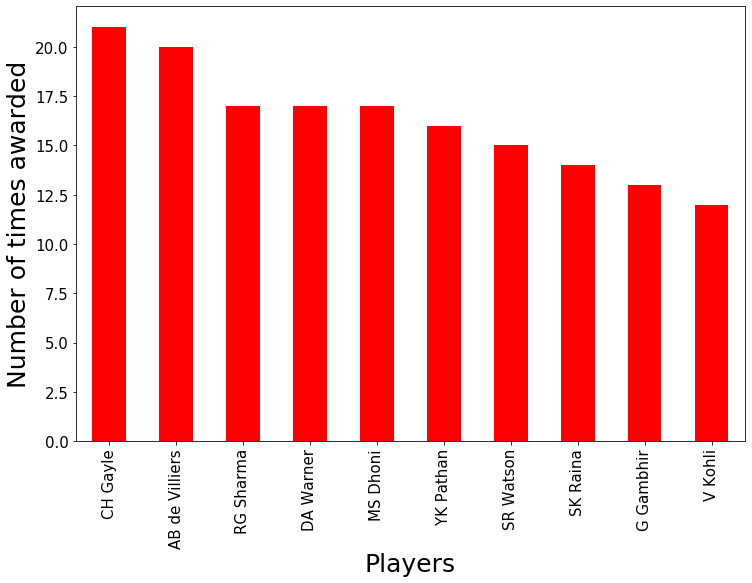

In [27]:
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='red')
plt.ylabel("Number of times awarded", size = 25)
plt.xlabel("Players", size = 25)

### Visualization of the number of matches played each season

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text yticklabel objects>)

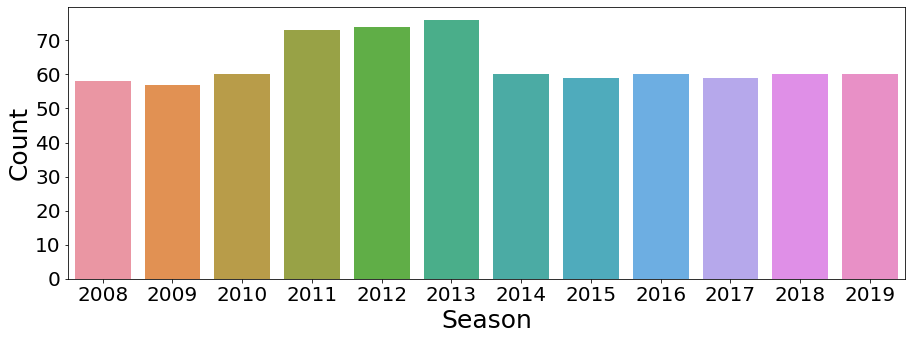

In [33]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = match_)
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)

### Visualization of the number of teams participated each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text yticklabel objects>)

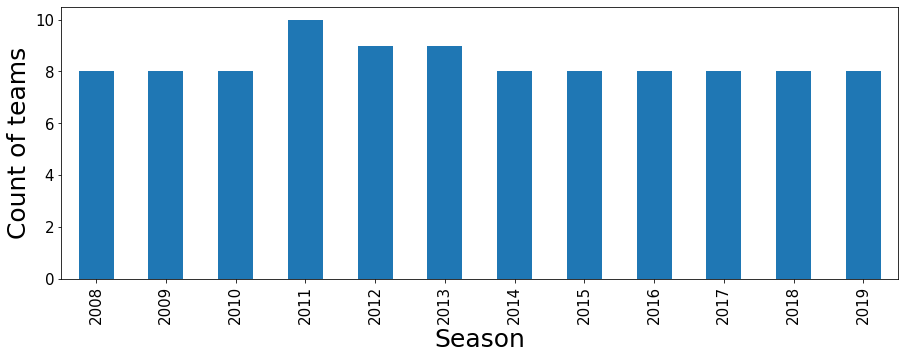

In [35]:
match_.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

### Top 10 players with highest number of runs

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text yticklabel objects>)

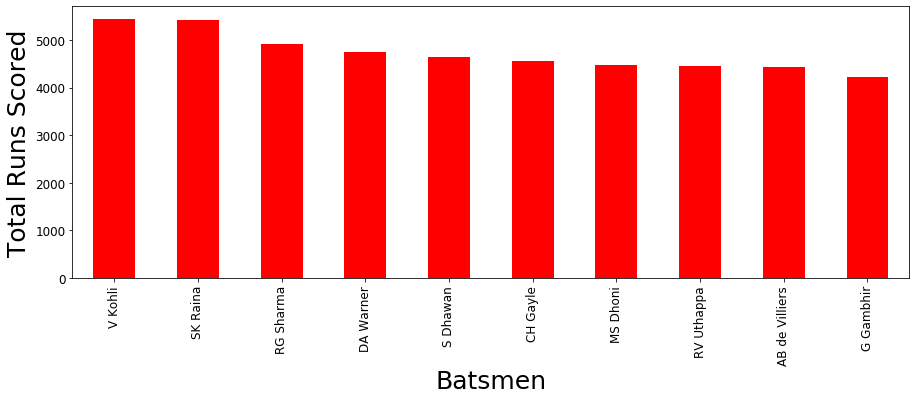

In [36]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'red',
                                                                                            figsize = (15,5))
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### Top 10 bowlers in IPL

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text yticklabel objects>)

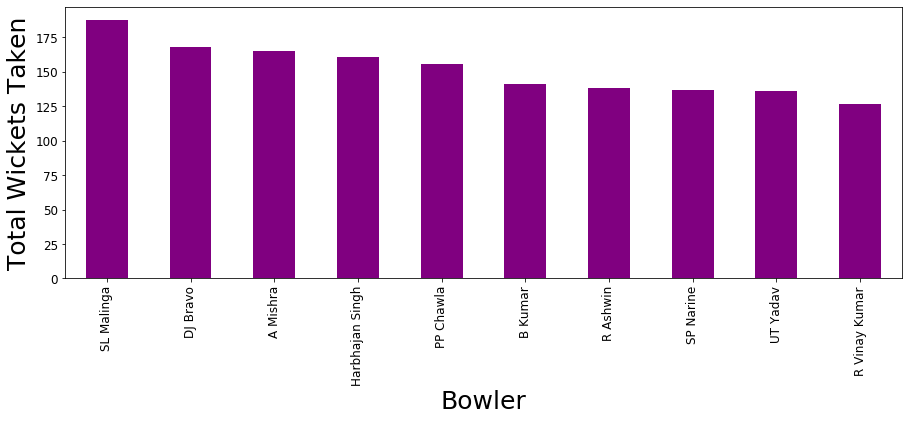

In [37]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

### Maximum runs scored by a team

In [39]:
match_.win_by_runs.max()

146

### Details of the match with maximum runs

In [40]:
match_.iloc[match_.win_by_runs.idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
Name: 43, dtype: object

###### The match with maximum runs was played between Mumbai Indians and Delhi Daredevils. The toss was won by Delhi Daredevils who chose to field first, while the match was won by Mumbai Indians. The player of the match was LMP Simmons. The match took place on 5th June, 2017 at Feroz Shah Kotla, Delhi. 

### Maxmimum wickets taken by a team

In [41]:
match_.win_by_wickets.max()

10

### Details of the match with maximum wickets 

In [42]:
match_.iloc[match_.win_by_wickets.idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
Name: 2, dtype: object

###### The match with maximum wickets was played between Gujarat Lions and Kolkata Knight Riders. The toss and the match was won by Kolkata Knight Riders. The winning team chose to field first. The player of the match was CA Lynn. The match took place on 4th July, 2017 at Saurashtra Cricket Association Stadium, Rajkot.

### Top 10 bowlers with maximum number of extras

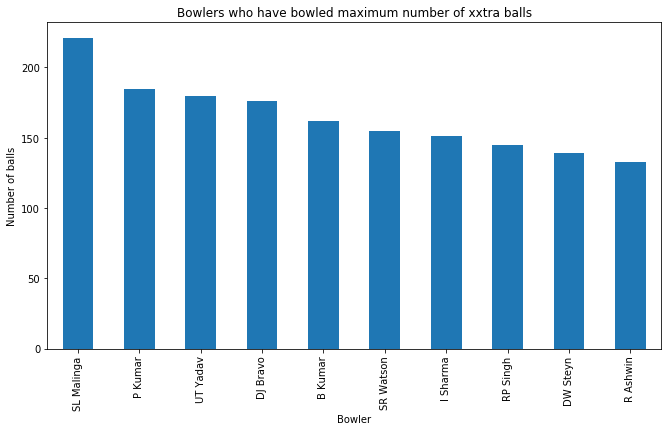

In [49]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of xxtra balls')
plt.xlabel('Bowler')
plt.ylabel('Number of balls')
plt.show()

## Conclusions:

### Problem Statement 2: As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.
1. Mumbai Indians is the most successful team, having won the maximum number of tosses as well as matches.
2. If the team who wins the toss chooses the field first then he has the highest chance of winning the match.
3. Chris Gayle has won the title 'Player of Match' maximum number of times. 
4. When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).


## Problem Statement 3: Suggest teams or players a company should endorse for its products.
1. If the company needs a bowler with good economy then go for DW Steyn ,M Muralitharan ,R Ashwin,SP Narine ,Harbhajan Singh.
2. If the company needs a bowler bowling most number of balls then go for Harbhajan Singh,SL Malinga,B Kumar,A Mishra,PP Chawla.
3. If the company needs a wicket taking bowler then go for SL Malinga,DJ Bravo,A Mishra ,Harbhajan Singh, PP Chawla.
4. If the company needs a experienced bowler then go for Harbhajan Singh ,A Mishra,PP Chawla ,R Ashwin,SL Malinga,DJ Bravo
5. If the company needs a batsman who could score good amount of runs every match the go for DA Warner, CH Gayle, V Kohli,AB de Villiers,S Dhawan.
